In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [351]:
df = pd.read_csv("Car_sale_ads.csv")
df.head(5)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


Data Cleaning

First We get rid off columns we are not going to use

In [352]:
df.drop(['Offer_location','First_registration_date','Origin_country','Vehicle_generation','Vehicle_version','CO2_emissions','First_owner'], axis = 1, inplace = True) 


Then We will save the new data frame so we won't need to load it every time

In [353]:
df.to_csv('Car_sale_ads_new.csv')

In [354]:
df = pd.read_csv("Car_sale_ads_new.csv")
df.head(5)

,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
1,1,1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,Front wheels,Manual,coupe,2.0,silver,03/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."


First We plot to try to find the outliers for each column and drop them

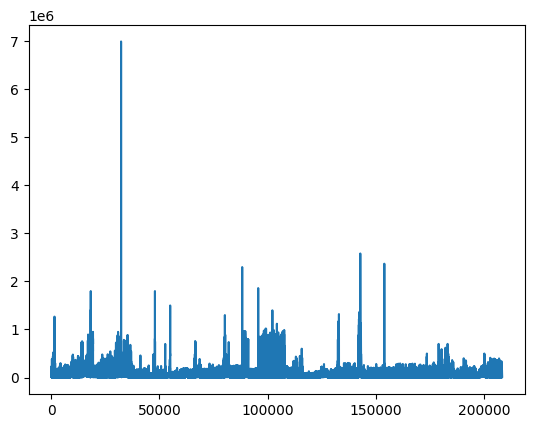

In [355]:
plt.plot(df['Price'])

After Plotting the price column we found that there is one value that didn't make sense so we will drop it

In [356]:
max_Price = df['Price'].idxmax()
df.loc[max_Price]

Unnamed: 0                                                            32304
Index                                                                 32304
Price                                                               6999000
Currency                                                                PLN
Condition                                                              Used
Vehicle_brand                                                           BMW
Vehicle_model                                                            X3
Production_year                                                        2014
Mileage_km                                                         238000.0
Power_HP                                                              190.0
Displacement_cm3                                                     2000.0
Fuel_type                                                            Diesel
Drive                                                       4x4 (permanent)
Transmission

In [357]:
df.drop(index=max_Price, axis=0, inplace=True) 


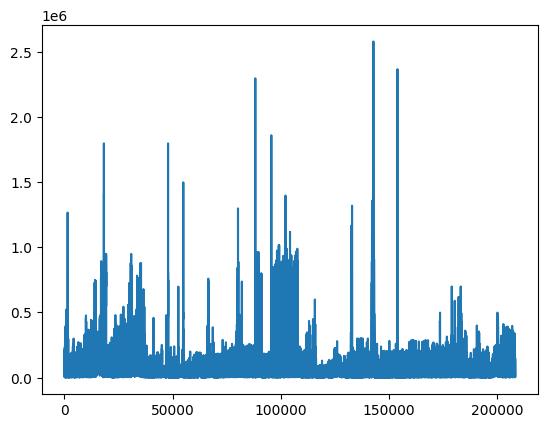

In [358]:
plt.plot(df['Price'])


We won't drop any other values as the price is mostly dependent on the vechicle brand and other columns so it won't be accurate

We will now remove the vechicles that has a production year less than or equal 1980 

Production year before dropping the rows

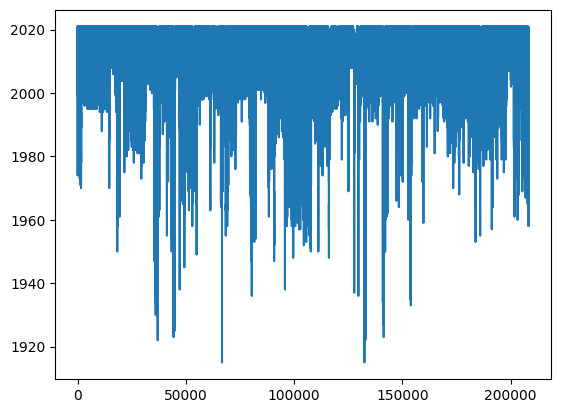

In [359]:
plt.plot(df['Production_year'])

In [360]:
df = df.drop(df[df.Production_year <= 1980].index)
df

,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,5,62950,PLN,Used,Abarth,595,2016,46060.0,180.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208296,208296,208296,1600,PLN,Used,Zastava,Other,1998,60000.0,60.0,1100.0,Gasoline,Front wheels,Manual,small_cars,3.0,yellow,29/04/2021,[]
208297,208297,208297,19900,PLN,Used,Zastava,1100,1981,18712.0,55.0,1116.0,Gasoline,NaN,Manual,compact,4.0,beige,04/05/2021,[]
208299,208299,208299,39900,PLN,Used,Żuk,Other,2014,40000.0,173.0,1301.0,Gasoline,NaN,Manual,small_cars,1.0,other,30/04/2021,[]
208302,208302,208302,5700,PLN,Used,Żuk,Other,1986,100000.0,36.0,2200.0,Gasoline,NaN,Manual,minivan,2.0,blue,24/04/2021,[]


Production year after dropping the rows

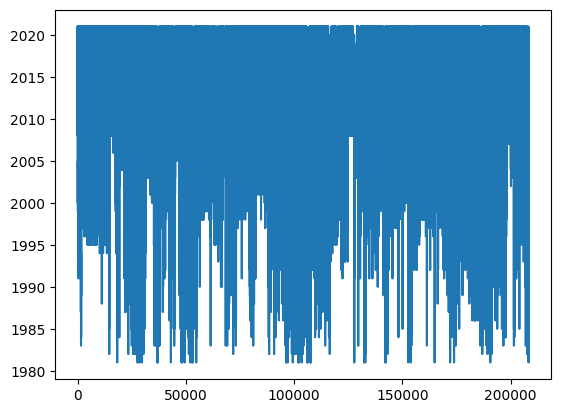

In [361]:
plt.plot(df['Production_year'])

Now we will remove any Vehicle that has more than 500k mileage

Before removing outliers

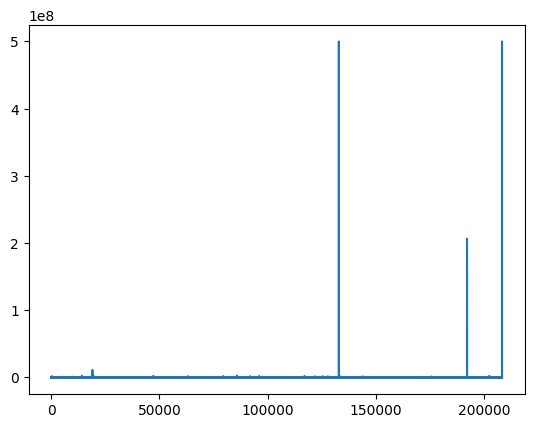

In [362]:
plt.plot(df['Mileage_km'])

In [363]:
df = df.drop(df[df.Mileage_km >= 500000].index)
df

,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,5,62950,PLN,Used,Abarth,595,2016,46060.0,180.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208296,208296,208296,1600,PLN,Used,Zastava,Other,1998,60000.0,60.0,1100.0,Gasoline,Front wheels,Manual,small_cars,3.0,yellow,29/04/2021,[]
208297,208297,208297,19900,PLN,Used,Zastava,1100,1981,18712.0,55.0,1116.0,Gasoline,NaN,Manual,compact,4.0,beige,04/05/2021,[]
208299,208299,208299,39900,PLN,Used,Żuk,Other,2014,40000.0,173.0,1301.0,Gasoline,NaN,Manual,small_cars,1.0,other,30/04/2021,[]
208302,208302,208302,5700,PLN,Used,Żuk,Other,1986,100000.0,36.0,2200.0,Gasoline,NaN,Manual,minivan,2.0,blue,24/04/2021,[]


After removing outliers

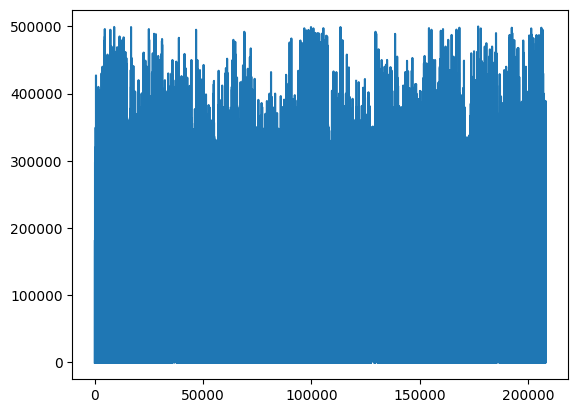

In [364]:
plt.plot(df['Mileage_km'])


Now will remove the vehicles that has a horse power greater than 800 or samller than 50

Before removing outliers

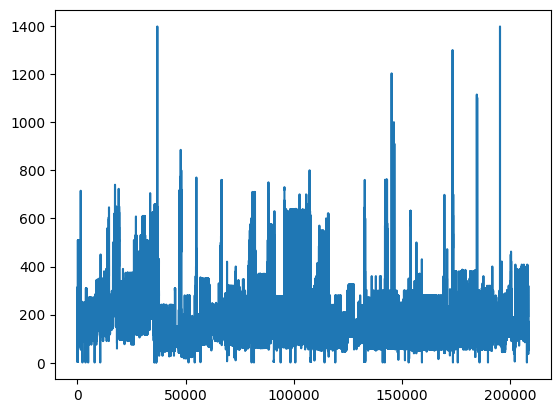

In [365]:
plt.plot(df['Power_HP'])

In [366]:
df = df.drop(df[df.Power_HP >= 800].index)
df


,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,5,62950,PLN,Used,Abarth,595,2016,46060.0,180.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208296,208296,208296,1600,PLN,Used,Zastava,Other,1998,60000.0,60.0,1100.0,Gasoline,Front wheels,Manual,small_cars,3.0,yellow,29/04/2021,[]
208297,208297,208297,19900,PLN,Used,Zastava,1100,1981,18712.0,55.0,1116.0,Gasoline,NaN,Manual,compact,4.0,beige,04/05/2021,[]
208299,208299,208299,39900,PLN,Used,Żuk,Other,2014,40000.0,173.0,1301.0,Gasoline,NaN,Manual,small_cars,1.0,other,30/04/2021,[]
208302,208302,208302,5700,PLN,Used,Żuk,Other,1986,100000.0,36.0,2200.0,Gasoline,NaN,Manual,minivan,2.0,blue,24/04/2021,[]


In [367]:
df = df.drop(df[df.Power_HP <= 50].index)
df

,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,5,62950,PLN,Used,Abarth,595,2016,46060.0,180.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208295,208295,208295,16999,PLN,Used,Zastava,1100,1981,62000.0,60.0,1100.0,Gasoline,NaN,Manual,coupe,3.0,green,25/04/2021,[]
208296,208296,208296,1600,PLN,Used,Zastava,Other,1998,60000.0,60.0,1100.0,Gasoline,Front wheels,Manual,small_cars,3.0,yellow,29/04/2021,[]
208297,208297,208297,19900,PLN,Used,Zastava,1100,1981,18712.0,55.0,1116.0,Gasoline,NaN,Manual,compact,4.0,beige,04/05/2021,[]
208299,208299,208299,39900,PLN,Used,Żuk,Other,2014,40000.0,173.0,1301.0,Gasoline,NaN,Manual,small_cars,1.0,other,30/04/2021,[]


After removing outliers

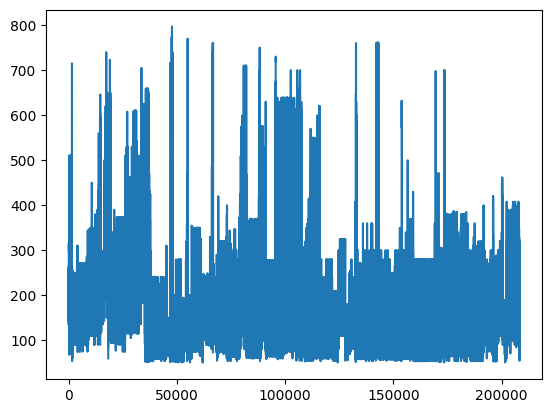

In [368]:
plt.plot(df['Power_HP'])

After seeing the plot for the displacement_cm3 column we found that removing any values won't be nessacary as the values are almost all close

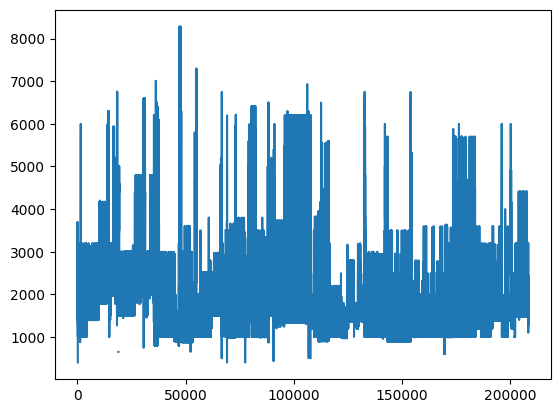

In [369]:
plt.plot(df['Displacement_cm3'])

Now we will remove the outliers for the doors_number that are grater than 7 and samller than 2

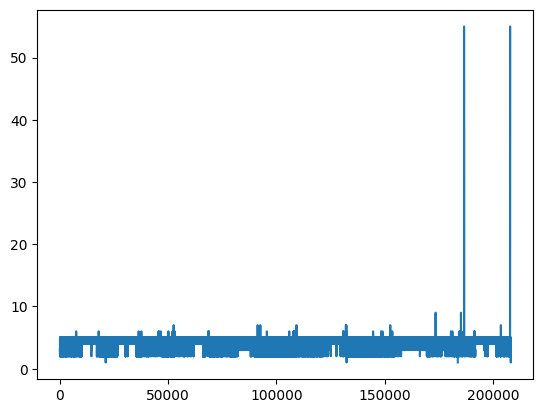

In [370]:
plt.plot(df['Doors_number'])

In [371]:
df = df.drop(df[df.Doors_number > 7].index)
df

,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,5,62950,PLN,Used,Abarth,595,2016,46060.0,180.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208295,208295,208295,16999,PLN,Used,Zastava,1100,1981,62000.0,60.0,1100.0,Gasoline,NaN,Manual,coupe,3.0,green,25/04/2021,[]
208296,208296,208296,1600,PLN,Used,Zastava,Other,1998,60000.0,60.0,1100.0,Gasoline,Front wheels,Manual,small_cars,3.0,yellow,29/04/2021,[]
208297,208297,208297,19900,PLN,Used,Zastava,1100,1981,18712.0,55.0,1116.0,Gasoline,NaN,Manual,compact,4.0,beige,04/05/2021,[]
208299,208299,208299,39900,PLN,Used,Żuk,Other,2014,40000.0,173.0,1301.0,Gasoline,NaN,Manual,small_cars,1.0,other,30/04/2021,[]


In [372]:
df = df.drop(df[df.Doors_number < 2].index)
df

,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,5,62950,PLN,Used,Abarth,595,2016,46060.0,180.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208285,208285,208285,27100,PLN,Used,Wołga,GAZ-24,1982,83000.0,95.0,2445.0,Gasoline,NaN,Manual,sedan,4.0,beige,30/04/2021,[]
208295,208295,208295,16999,PLN,Used,Zastava,1100,1981,62000.0,60.0,1100.0,Gasoline,NaN,Manual,coupe,3.0,green,25/04/2021,[]
208296,208296,208296,1600,PLN,Used,Zastava,Other,1998,60000.0,60.0,1100.0,Gasoline,Front wheels,Manual,small_cars,3.0,yellow,29/04/2021,[]
208297,208297,208297,19900,PLN,Used,Zastava,1100,1981,18712.0,55.0,1116.0,Gasoline,NaN,Manual,compact,4.0,beige,04/05/2021,[]


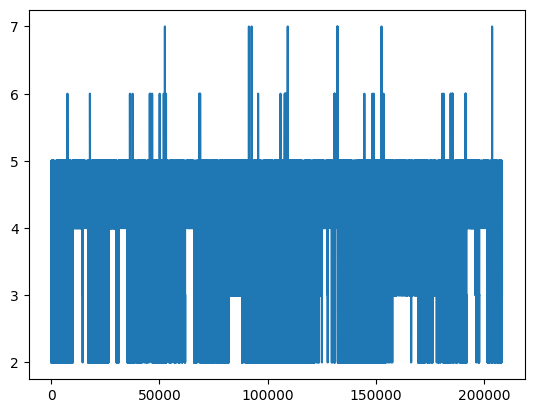

In [373]:
plt.plot(df['Doors_number'])

We will remove every vehicle brand that has only 10 ads or less

In [374]:
df = df[df.groupby('Vehicle_brand').Vehicle_brand.transform('count')>10]
df


,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,5,62950,PLN,Used,Abarth,595,2016,46060.0,180.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208268,208268,208268,57900,PLN,Used,Volvo,XC 60,2011,140000.0,163.0,2000.0,Diesel,Front wheels,Manual,SUV,5.0,golden,01/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
208269,208269,208269,18600,PLN,Used,Volvo,XC 90,2006,240000.0,163.0,2401.0,Diesel,4x4 (attached automatically),Automatic,SUV,5.0,gray,03/05/2021,['Automatic air conditioning']
208270,208270,208270,24900,PLN,Used,Volvo,V70,2008,262000.0,136.0,1998.0,Diesel,Front wheels,Manual,station_wagon,5.0,other,29/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
208271,208271,208271,154480,PLN,New,Volvo,XC 60,2021,5.0,197.0,1969.0,Gasoline,Front wheels,Automatic,SUV,5.0,other,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."


Now we will fill the null values in the drive column based on the vehicle brand mode in the drive column

In [375]:
vehicleBrands = df['Vehicle_brand'].unique()
for i in range(len(vehicleBrands)):
    

    brand = df['Vehicle_brand']== vehicleBrands[i]
    
    brandMode = df.loc[brand]['Drive'].mode()

    rows = df.loc[brand]
    rows.loc[rows['Drive'].isnull(),'Drive'] = brandMode[0]
    
    df.loc[brand,'Drive'] = rows

Now we will fill the null values in the Transmission column based on the vehicle brand mode in the Transmission column

In [376]:
vehicleBrands = df['Vehicle_brand'].unique()
for i in range(len(vehicleBrands)):
    

    brand = df['Vehicle_brand']== vehicleBrands[i]
    
    brandMode = df.loc[brand]['Transmission'].mode()

    rows = df.loc[brand]
    rows.loc[rows['Transmission'].isnull(),'Transmission'] = brandMode[0]
    
    df.loc[brand,'Transmission'] = rows

Now we will change the null values of the doors number column based on the mode of the doors number column

In [ ]:
doorsMode = df['Doors_number'].mode()[0]
df['Doors_number'] = df['Doors_number'].fillna(doorsMode)

In [383]:
percent_missing = df. isnull(). sum() * 100 / len(df)
percent_missing

Unnamed: 0                0.000000
Index                     0.000000
Price                     0.000000
Currency                  0.000000
Condition                 0.000000
Vehicle_brand             0.000000
Vehicle_model             0.000000
Production_year           0.000000
Mileage_km                0.476546
Power_HP                  0.295720
Displacement_cm3          0.912855
Fuel_type                 0.000000
Drive                     0.000000
Transmission              0.000000
Type                      0.000000
Doors_number              0.000000
Colour                    0.000000
Offer_publication_date    0.000000
Features                  0.000000
dtype: float64